# This notebook has the commands for creating a horizontal bar chart for substance use proportion data within communities

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [93]:
#data_arms1 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS1_comb_fluid_comm.csv')
#data_arms2 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS2_comb_fluid_comm.csv')
data_arms1 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS1_comb_list_comm.csv')
data_arms2 = pd.read_csv('/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS2_comb_list_comm.csv')

data_arms1

,subject_id,community
0,NDAR_INV003RTV85,7
1,NDAR_INV007W6H7B,7
2,NDAR_INV00BD7VDC,5
3,NDAR_INV00HEV6HB,1
4,NDAR_INV00LH735Y,8
...,...,...
3332,NDAR_INVZY8L7CT1,4
3333,NDAR_INVZYC44GB8,2
3334,NDAR_INVZZ05KY5J,1
3335,NDAR_INVZZFG6J5U,4


In [94]:
#currently keeping all communities, regardless of size, because we are trying to evaluate across the arms with the overfit xgb model

communities_more_than_100_arms1 = data_arms1['community'].value_counts()[data_arms1['community'].value_counts() > 100].index
communities_more_than_100_arms2 = data_arms2['community'].value_counts()[data_arms2['community'].value_counts() > 100].index
filtered_data_arms1 = data_arms1[data_arms1['community'].isin(communities_more_than_100_arms1)]
filtered_data_arms2 = data_arms2[data_arms2['community'].isin(communities_more_than_100_arms2)]

In [95]:
#convert community to a categorical variable to ensure proper ordering on the x-axis
filtered_data_arms1.loc[:, 'community'] = pd.Categorical(filtered_data_arms1['community'])
filtered_data_arms2.loc[:, 'community'] = pd.Categorical(filtered_data_arms2['community'])

In [96]:
filtered_data_arms1

,subject_id,community
0,NDAR_INV003RTV85,7
1,NDAR_INV007W6H7B,7
2,NDAR_INV00BD7VDC,5
3,NDAR_INV00HEV6HB,1
4,NDAR_INV00LH735Y,8
...,...,...
3332,NDAR_INVZY8L7CT1,4
3333,NDAR_INVZYC44GB8,2
3334,NDAR_INVZZ05KY5J,1
3335,NDAR_INVZZFG6J5U,4


In [97]:
substance_use_df = pd.read_csv('./subjectID_plus_number_of_uses.csv')
substance_use_df = substance_use_df.rename(columns={'src_subject_id': 'subject_id'})
substance_use_df

,subject_id,tlfb_cal_scr_num_events
0,NDAR_INV03CV8RDT,8.0
1,NDAR_INV04EUBGTM,6.0
2,NDAR_INV06A9DLE9,1.0
3,NDAR_INV07CMT243,29.0
4,NDAR_INV0A6WVRZY,4.0
...,...,...
606,NDAR_INVZPEYC15U,0.0
607,NDAR_INVZRKWPYJL,4.0
608,NDAR_INVZWE6CD6Y,276.0
609,NDAR_INVZZFG6J5U,8.0


In [98]:
merged_use_df = filtered_data_arms1.merge(substance_use_df, on='subject_id', how='outer')
merged_use_df

,subject_id,community,tlfb_cal_scr_num_events
0,NDAR_INV003RTV85,7.0,NaN
1,NDAR_INV007W6H7B,7.0,NaN
2,NDAR_INV00BD7VDC,5.0,NaN
3,NDAR_INV00HEV6HB,1.0,NaN
4,NDAR_INV00LH735Y,8.0,NaN
...,...,...,...
3601,NDAR_INVZYC44GB8,2.0,NaN
3602,NDAR_INVZZ05KY5J,1.0,NaN
3603,NDAR_INVZZFG6J5U,4.0,8.0
3604,NDAR_INVZZJ3A7BK,NaN,142.0


In [99]:
merged_use_df['community'].isna().sum()

460

In [100]:
merged_use_no_nan = merged_use_df.dropna(subset=['community'])
merged_use_no_nan

,subject_id,community,tlfb_cal_scr_num_events
0,NDAR_INV003RTV85,7.0,NaN
1,NDAR_INV007W6H7B,7.0,NaN
2,NDAR_INV00BD7VDC,5.0,NaN
3,NDAR_INV00HEV6HB,1.0,NaN
4,NDAR_INV00LH735Y,8.0,NaN
...,...,...,...
3600,NDAR_INVZY8L7CT1,4.0,NaN
3601,NDAR_INVZYC44GB8,2.0,NaN
3602,NDAR_INVZZ05KY5J,1.0,NaN
3603,NDAR_INVZZFG6J5U,4.0,8.0


In [101]:
merged_use_no_nan['tlfb_cal_scr_num_events'].isna().sum()

2995

In [102]:
merged_use_nonan_df = merged_use_no_nan.dropna(subset=['tlfb_cal_scr_num_events'])
merged_use_nonan_df

,subject_id,community,tlfb_cal_scr_num_events
20,NDAR_INV04EUBGTM,4.0,6.0
26,NDAR_INV06A9DLE9,5.0,1.0
60,NDAR_INV0CV2Y4YR,1.0,0.0
85,NDAR_INV0HXXANFJ,6.0,2.0
142,NDAR_INV10J5M8LB,5.0,6.0
...,...,...,...
3562,NDAR_INVZCGL10MP,5.0,6.0
3563,NDAR_INVZD57Y0V7,3.0,12.0
3565,NDAR_INVZDYWHP34,5.0,1.0
3578,NDAR_INVZK8052MG,1.0,7.0


In [103]:
merged_use_nonan_df['tlfb_cal_scr_num_events'].value_counts()

tlfb_cal_scr_num_events
1.0      35
2.0      22
5.0      13
6.0      12
4.0      12
0.0       9
3.0       8
8.0       4
7.0       3
14.0      3
45.0      2
16.0      2
28.0      2
13.0      2
12.0      2
497.0     1
10.0      1
48.0      1
59.0      1
52.0      1
22.0      1
30.0      1
153.0     1
269.0     1
49.0      1
102.0     1
93.0      1
316.0     1
11.0      1
29.0      1
265.0     1
140.0     1
782.0     1
146.0     1
40.0      1
Name: count, dtype: int64

In [104]:
conditions = [
    merged_use_nonan_df['tlfb_cal_scr_num_events'] == 0.0,
    merged_use_nonan_df['tlfb_cal_scr_num_events'].isin([1.0, 2.0]),
    (merged_use_nonan_df['tlfb_cal_scr_num_events'] >= 3.0) & (merged_use_nonan_df['tlfb_cal_scr_num_events'] <= 9.0),
    merged_use_nonan_df['tlfb_cal_scr_num_events'] >= 10.0
]

values = [1,2,3,4]

merged_use_nonan_df_new = pd.DataFrame({'subject_id': merged_use_nonan_df['subject_id'], 'community': merged_use_nonan_df['community'], 'tlfb_cal_scr_num_events': merged_use_nonan_df['tlfb_cal_scr_num_events']})


merged_use_nonan_df_new['usage_class'] = np.select(conditions, values, default=np.nan).astype(int)
merged_use_nonan_df_new

,subject_id,community,tlfb_cal_scr_num_events,usage_class
20,NDAR_INV04EUBGTM,4.0,6.0,3
26,NDAR_INV06A9DLE9,5.0,1.0,2
60,NDAR_INV0CV2Y4YR,1.0,0.0,1
85,NDAR_INV0HXXANFJ,6.0,2.0,2
142,NDAR_INV10J5M8LB,5.0,6.0,3
...,...,...,...,...
3562,NDAR_INVZCGL10MP,5.0,6.0,3
3563,NDAR_INVZD57Y0V7,3.0,12.0,4
3565,NDAR_INVZDYWHP34,5.0,1.0,2
3578,NDAR_INVZK8052MG,1.0,7.0,3


In [105]:
merged_use_nonan_df

,subject_id,community,tlfb_cal_scr_num_events
20,NDAR_INV04EUBGTM,4.0,6.0
26,NDAR_INV06A9DLE9,5.0,1.0
60,NDAR_INV0CV2Y4YR,1.0,0.0
85,NDAR_INV0HXXANFJ,6.0,2.0
142,NDAR_INV10J5M8LB,5.0,6.0
...,...,...,...
3562,NDAR_INVZCGL10MP,5.0,6.0
3563,NDAR_INVZD57Y0V7,3.0,12.0
3565,NDAR_INVZDYWHP34,5.0,1.0
3578,NDAR_INVZK8052MG,1.0,7.0


In [106]:
merged_use_nonan_df['community'].unique()

array([4., 5., 1., 6., 9., 3., 2., 7., 8.])

In [107]:
def summarize_by_usage_class(df):
    summary = df.groupby(['community', 'usage_class'], observed=False).size().reset_index(name='count')
    #for comm in summary['community'].unique():
    #    for usage_class in summary['usage_class'].unique():
    #        if comm not in summary['community']:
    #            summary['count'] = 0
    
    #summary = summary.sort_index(axis=1).reset_index()
    
    #summary = summary.melt(id_vars=['community'], var_name='usage_class', value_name='count')
    
    #summary = summary.sort_values(['community', 'usage_class']).reset_index(drop=True)
    return summary

In [108]:
merged_use_df_counts = summarize_by_usage_class(merged_use_nonan_df_new)
merged_use_df_counts

,community,usage_class,count
0,1.0,1,3
1,1.0,2,9
2,1.0,3,14
3,1.0,4,11
4,2.0,1,1
5,2.0,2,6
6,2.0,3,11
7,2.0,4,4
8,3.0,1,3
9,3.0,2,6


In [109]:
#function to aggregate the new summary data

def aggregate_summary_data(summary_data):
    return summary_data.groupby(['community', 'usage_class'],observed=False).agg(count=('count', 'sum')).reset_index()

In [110]:
merged_use_df_counts_test = aggregate_summary_data(merged_use_df_counts)
merged_use_df_counts_test

,community,usage_class,count
0,1.0,1,3
1,1.0,2,9
2,1.0,3,14
3,1.0,4,11
4,2.0,1,1
5,2.0,2,6
6,2.0,3,11
7,2.0,4,4
8,3.0,1,3
9,3.0,2,6


In [111]:
#calculate the relevant proportions and add it as a new column
merged_use_df_counts_test['proportion'] = merged_use_df_counts_test.groupby('community', observed=False)['count'].transform(lambda x: x / x.sum())
merged_use_df_counts_test

,community,usage_class,count,proportion
0,1.0,1,3,0.081081
1,1.0,2,9,0.243243
2,1.0,3,14,0.378378
3,1.0,4,11,0.297297
4,2.0,1,1,0.045455
5,2.0,2,6,0.272727
6,2.0,3,11,0.500000
7,2.0,4,4,0.181818
8,3.0,1,3,0.157895
9,3.0,2,6,0.315789


In [112]:
#pivot the data to prepare it for visualization

df_pivot = merged_use_df_counts_test.pivot(index='community', columns='usage_class', values='proportion')
df_pivot = df_pivot.sort_index()
df_pivot

usage_class,1,2,3,4
community,,,,
1.0,0.081081,0.243243,0.378378,0.297297
2.0,0.045455,0.272727,0.500000,0.181818
3.0,0.157895,0.315789,0.210526,0.315789
4.0,0.055556,0.500000,0.222222,0.222222
5.0,NaN,0.500000,0.250000,0.250000
6.0,0.062500,0.500000,0.437500,NaN
7.0,NaN,0.454545,0.454545,0.090909
8.0,NaN,0.750000,0.250000,NaN
9.0,NaN,0.375000,0.250000,0.375000


# Create Plot. Make sure figure is named properly

<Figure size 1200x1000 with 0 Axes>

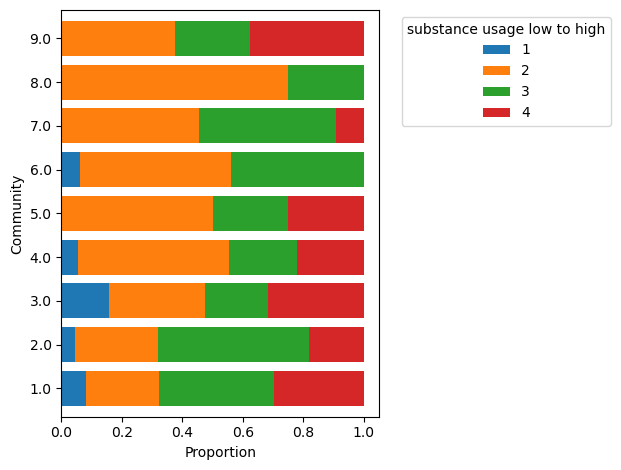

In [113]:
#plot the horizontal bar chart of the adhd label proportion data

#create the horizontal stacked bar chart
plt.figure(figsize=(12, 10))
ax = df_pivot.plot(kind='barh', stacked=True, width=0.8)

#customize the plot
#plt.title('ADHD Label Proportion for ARMS1, List')
plt.xlabel('Proportion')
plt.ylabel('Community')

#remove the legend from its current position
plt.legend().remove()

#add a legend to the right of the plot
plt.legend(title='substance usage low to high', bbox_to_anchor=(1.05, 1), loc='upper left')

#add percentage labels on the bars
#for c in ax.containers:
#    ax.bar_label(c, fmt='%.2f%%', label_type='center')

#adjust layout and display the plot
plt.tight_layout()
#plt.savefig('./list_adhd_proportions_arms1data_remake.png', dpi=300, bbox_inches='tight')
plt.show()

# trying something else

In [125]:
merged_use_nonan_df.head(5)

,subject_id,community,tlfb_cal_scr_num_events
20,NDAR_INV04EUBGTM,4.0,6.0
26,NDAR_INV06A9DLE9,5.0,1.0
60,NDAR_INV0CV2Y4YR,1.0,0.0
85,NDAR_INV0HXXANFJ,6.0,2.0
142,NDAR_INV10J5M8LB,5.0,6.0


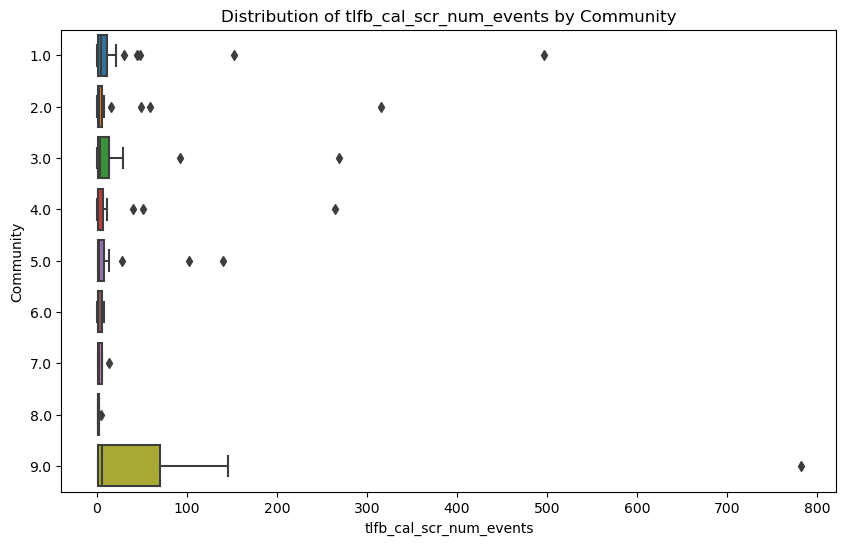

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tlfb_cal_scr_num_events', y='community', data=merged_use_nonan_df, orient='h')
plt.title('Distribution of tlfb_cal_scr_num_events by Community')
plt.xlabel('tlfb_cal_scr_num_events')
plt.ylabel('Community')
plt.show()

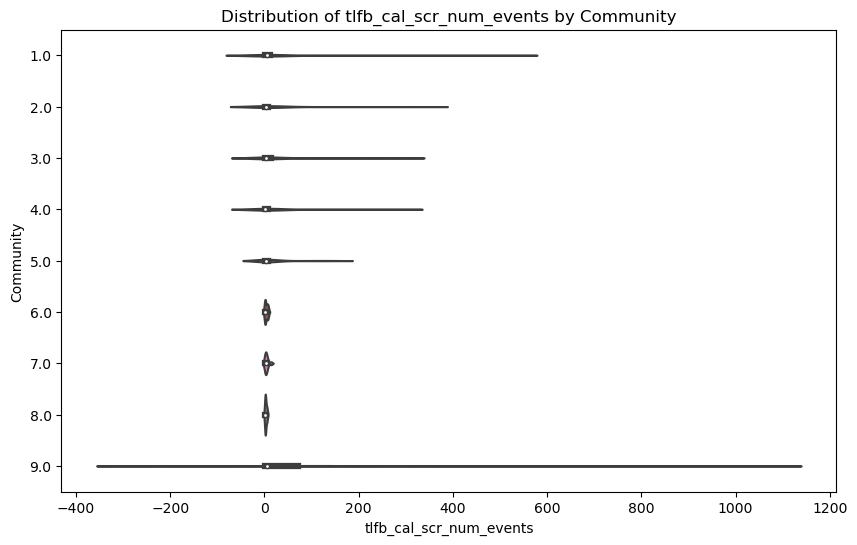

In [128]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='tlfb_cal_scr_num_events', y='community', data=merged_use_nonan_df, orient='h')
plt.title('Distribution of tlfb_cal_scr_num_events by Community')
plt.xlabel('tlfb_cal_scr_num_events')
plt.ylabel('Community')
plt.show()

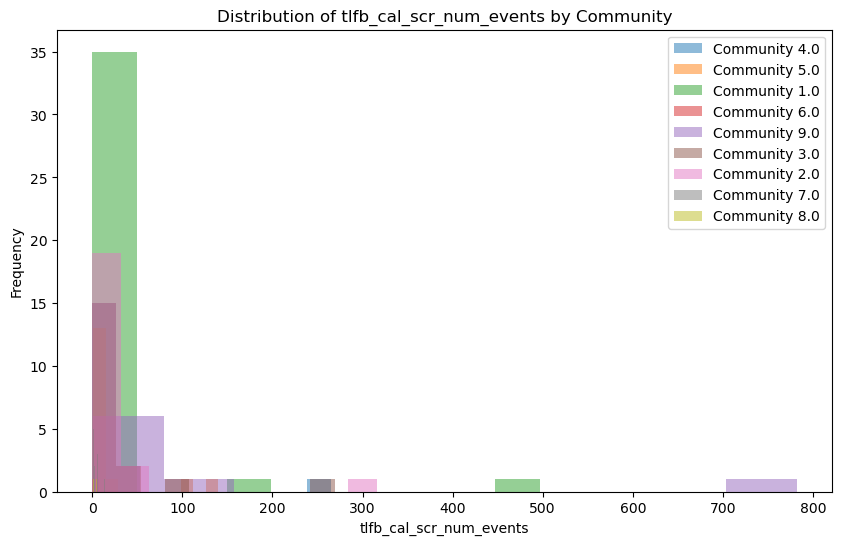

In [133]:
plt.figure(figsize=(10, 6))

for community in merged_use_nonan_df['community'].unique():
    community_data = merged_use_nonan_df[merged_use_nonan_df['community'] == community]['tlfb_cal_scr_num_events']
    plt.hist(community_data, bins=10, alpha=0.5, label=f'Community {community}')

plt.title('Distribution of tlfb_cal_scr_num_events by Community')
plt.xlabel('tlfb_cal_scr_num_events')
plt.ylabel('Frequency')
plt.legend()
plt.show()

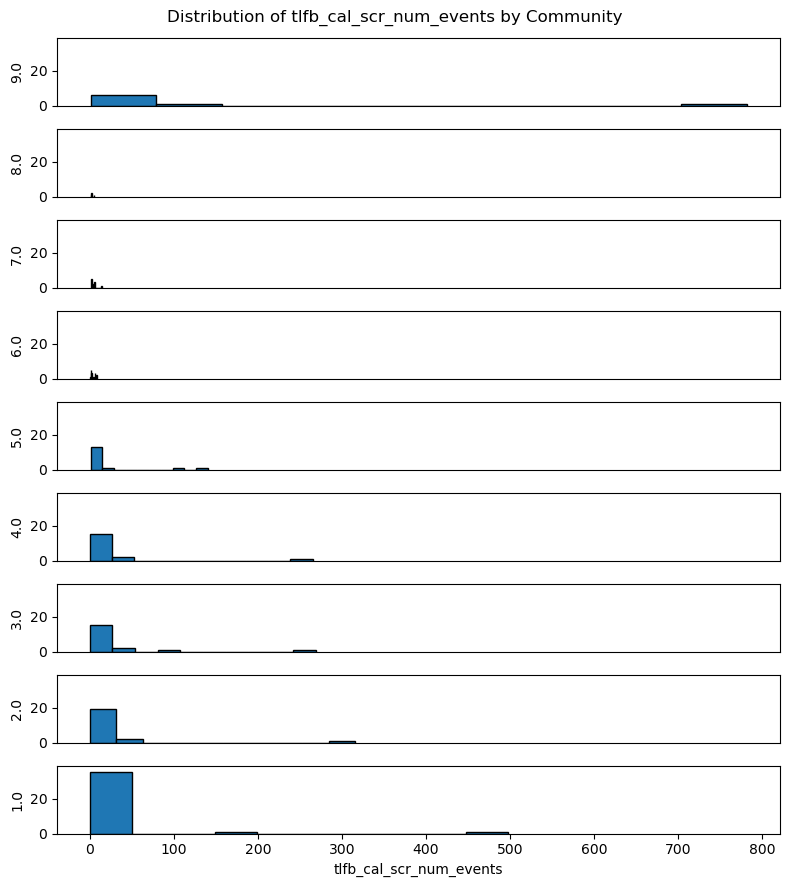

In [138]:
sorted_communities = sorted(merged_use_nonan_df['community'].unique(), reverse=True)
height_per_subplot = 1

# Create subplots
fig, axs = plt.subplots(len(sorted_communities), 1, figsize=(8, height_per_subplot*len(sorted_communities)), sharex=True, sharey=True)
fig.suptitle('Distribution of tlfb_cal_scr_num_events by Community')

# Find the overall max frequency for y-axis limit
max_freq = 0

# First pass to calculate histogram data and find max frequency
hist_data = []
for community in sorted_communities:
    community_data = merged_use_nonan_df[merged_use_nonan_df['community'] == community]['tlfb_cal_scr_num_events']
    counts, _ = np.histogram(community_data, bins=10)
    max_freq = max(max_freq, counts.max())
    hist_data.append((community_data, counts))

# Plot histogram for each community
for i, (community, (community_data, counts)) in enumerate(zip(sorted_communities, hist_data)):
    axs[i].hist(community_data, bins=10, edgecolor='black')
    axs[i].set_ylabel(f'{community}')
    axs[i].set_ylim(0, max_freq * 1.1)  # Set y-axis limit with 10% padding

# Remove x-labels and tick labels for all but the bottom subplot
for ax in axs[:-1]:
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Set x-label for the bottom subplot
axs[-1].set_xlabel('tlfb_cal_scr_num_events')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [123]:
merged_use_nonan_df.groupby(['community', 'tlfb_cal_scr_num_events'],observed=False).agg(count=('subject_id', 'sum')).reset_index()
merged_use_nonan_df


,subject_id,community,tlfb_cal_scr_num_events
20,NDAR_INV04EUBGTM,4.0,6.0
26,NDAR_INV06A9DLE9,5.0,1.0
60,NDAR_INV0CV2Y4YR,1.0,0.0
85,NDAR_INV0HXXANFJ,6.0,2.0
142,NDAR_INV10J5M8LB,5.0,6.0
...,...,...,...
3562,NDAR_INVZCGL10MP,5.0,6.0
3563,NDAR_INVZD57Y0V7,3.0,12.0
3565,NDAR_INVZDYWHP34,5.0,1.0
3578,NDAR_INVZK8052MG,1.0,7.0


In [124]:
df_pivot = merged_use_nonan_df.pivot(index='community', columns='tlfb_cal_scr_num_events', values='subject_id')
df_pivot

ValueError: Index contains duplicate entries, cannot reshape